C:\Users\avaidya\AppData\Local\Temp\ipykernel_29484\296915042.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (df_counts / total_responses[:, None]) * 100


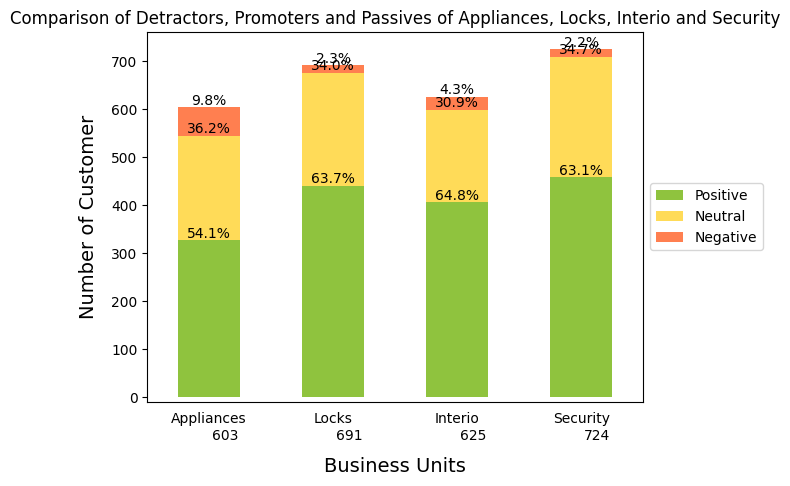

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading the input file
df = pd.read_csv('Iteration_2.csv')

# Calculate the counts for each label and category
counts_appliances = df['Appliances_label'].value_counts()
counts_locks = df['Locks_label'].value_counts()
counts_interio = df['Interio_label'].value_counts()
counts_security = df['Security_label'].value_counts()

# Create a DataFrame with the counts 
df_counts = pd.DataFrame({'Appliances': counts_appliances, 'Locks': counts_locks, 'Interio': counts_interio, 'Security': counts_security})

# Transpose the DataFrame
df_counts = df_counts.transpose()

# Calculate the total number of responses
total_responses = df_counts.sum(axis=1)

# Calculate the percentage for each category
percentages = (df_counts / total_responses[:, None]) * 100

# Create a stacked bar plot
ax = df_counts.plot(kind='bar', stacked=True, color=["#8FC33E","#FFDB58", "#FF7F50"])

# Set the title and labels
plt.xticks(rotation=0)
plt.title('Comparison of Detractors, Promoters and Passives of Appliances, Locks, Interio and Security')
plt.xlabel('Business Units', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)

# Get the current axis object
ax = plt.gca()

# Set the x-axis tick labels position to bottom
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Set the y-axis tick labels position to left
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# Set the x and y-axis label positions
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.1, 0.5)

# Add data labels to the stacked bars with padding
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10,
                 labels=[f"{val:.1f}%" for val in percentages[container.get_label()]])

# Move the legend to the right side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set the y-axis limits to move the total downwards
ax.set_ylim(bottom=-10)

# Add text for the totals
plt.text(0.02, -90, f"{total_responses['Appliances']:.0f}", fontsize=10)
plt.text(1.02, -90, f"{total_responses['Locks']:.0f}", fontsize=10)
plt.text(2.02, -90, f"{total_responses['Interio']:.0f}", fontsize=10)
plt.text(3.02, -90, f"{total_responses['Security']:.0f}", fontsize=10)



# Show the plot
plt.show()

